In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random

train_df  = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Training data dimension: ", train_df.shape)
print("Test data dimension: ", test_df.shape)

Training data dimension:  (466, 13)
Test data dimension:  (51, 13)


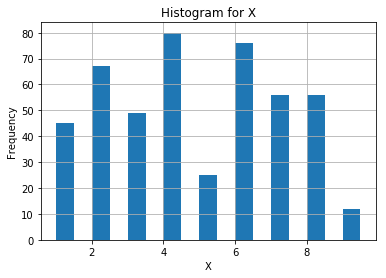

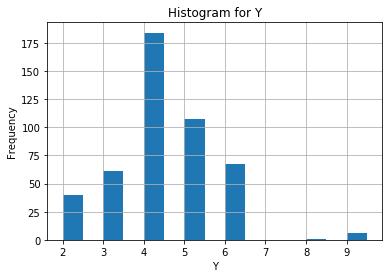

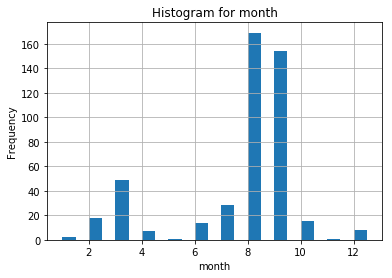

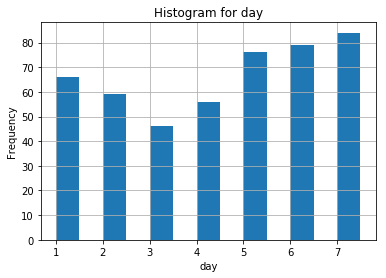

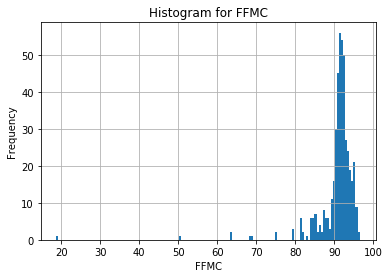

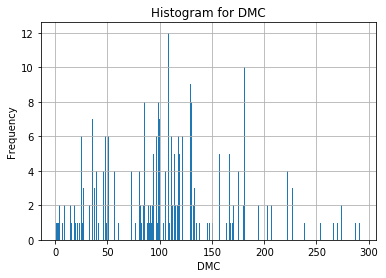

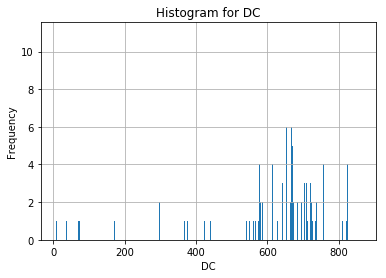

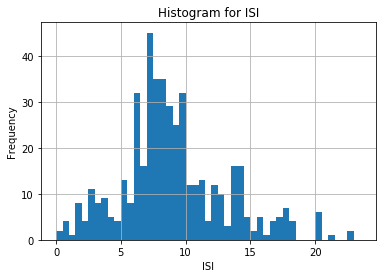

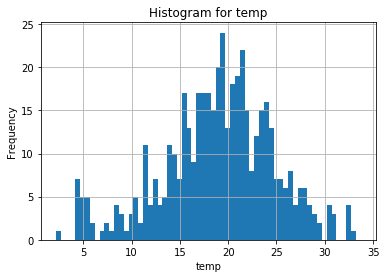

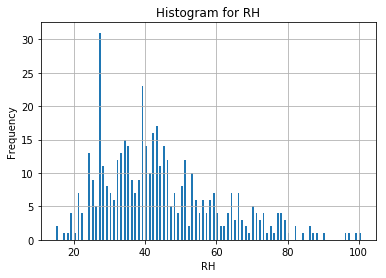

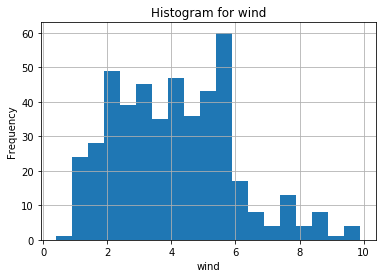

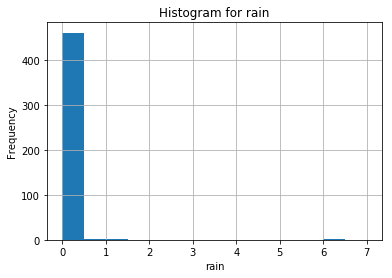

In [166]:
#3 (a) Data exploration
#Plotting the histograms of all features

features_list = list(train_df.columns.values)

for i in range(12):
    plt.hist(train_df.iloc[:,i],bins=np.arange(min(train_df.iloc[:,i]), 
                                max(train_df.iloc[:,i]) + 1, 0.5))
    plt.xlabel(features_list[i])
    plt.ylabel('Frequency')
    plt.title('Histogram for {}'. format(features_list[i]))
    plt.grid(True)
    plt.show()

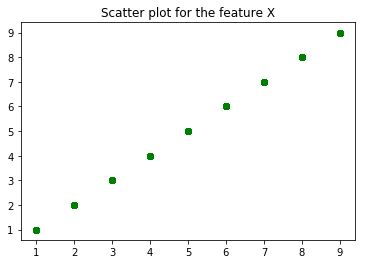

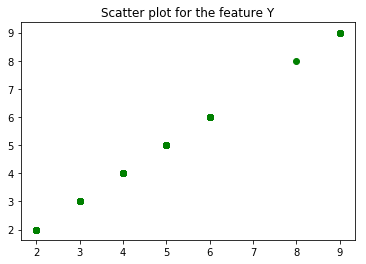

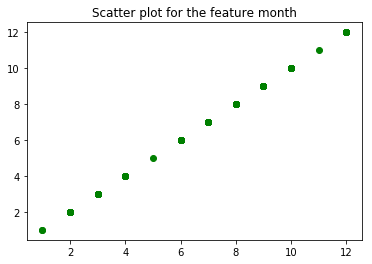

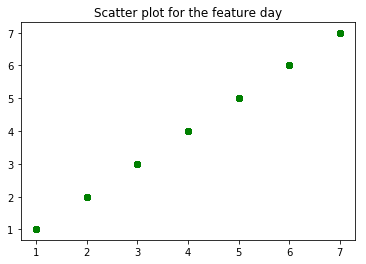

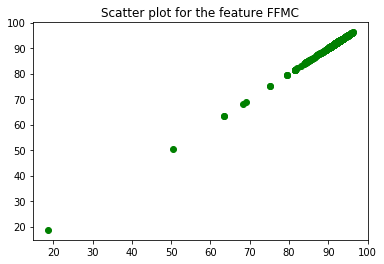

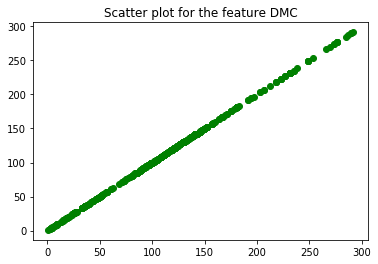

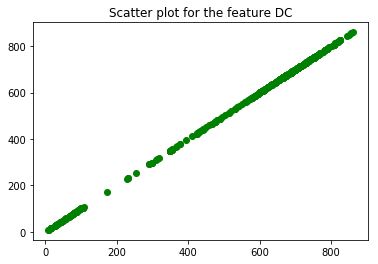

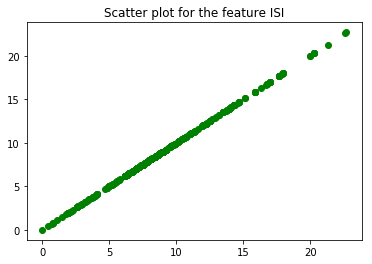

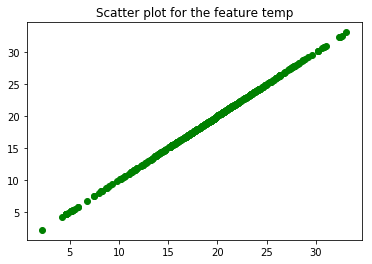

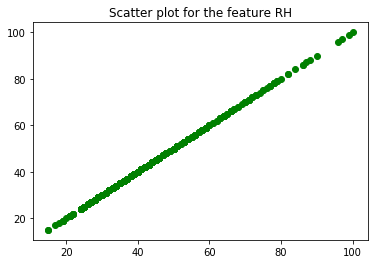

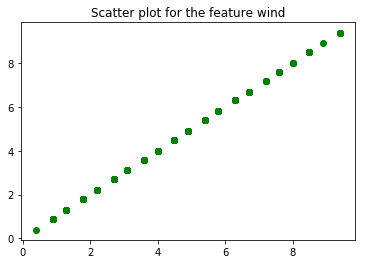

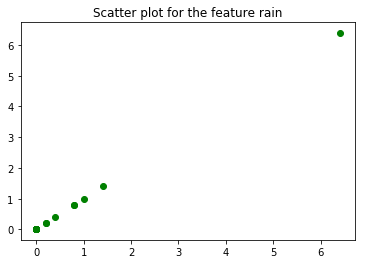

In [167]:
#Plotting scatter plots for the features
for i in range(12):
    plt.scatter(train_df.iloc[:,i],train_df.iloc[:,i],c='g')
    plt.title('Scatter plot for the feature {}'. format(features_list[i]))
    plt.show()

In [ ]:
Categorical Features: 'X', 'Y', 'month', 'day'
Continuous Features: 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'

In [168]:
import math

#Feature normalization
#min-max normalization
n_train_df=(train_df-train_df.min())/(train_df.max()-train_df.min())
n_test_df = (test_df-train_df.min())/(train_df.max()-train_df.min())


In [169]:
#Question 3 b.i) KNN classifier using the euclidean distance
#(customized distance metrics option also available)
#KNN classifier 
#Returns a list of labels for all the test samples
def KNN(k,n_train_df,n_test_df,distance_metric):
    testList = []
    for test_row_index, test_row in n_test_df.iterrows():
        distList = []
        for train_row_index, train_row in n_train_df.iterrows():
            distance = computeDistance(train_row,test_row,distance_metric)
            distList.append((distance,train_row[-1]))
        distList.sort()
        fire_class , no_fire_class = 0,0
        for i in range(k):
            if(distList[i][1] > 0):
                fire_class += 1
            else:
                no_fire_class += 1
        if(fire_class > no_fire_class):
            testList.append(1)
        else:
            testList.append(0)
    return testList

In [170]:
#Function to compute the distance between two given samples, 
#given the specific distance metric
def computeDistance(train_row,test_row,metricType):
    if metricType == "euclidean":
        distance = 0
        for i in range(len(train_row)-1):
            distance = distance+(train_row[i]-test_row[i])*(train_row[i]-test_row[i])
        return math.sqrt(distance)
    elif metricType == "manhattan":
        distance = 0
        for i in range(len(train_row)-1):
            distance = distance + abs(train_row[i] - test_row[i])
        return distance
    elif metricType == "hamming":
        distance = 0
        #calculating euclidean distance for the non 
        #categorical features
        for i in range(4,len(train_row)-1):
            distance = distance+(train_row[i]-test_row[i])*(train_row[i]-test_row[i])
        distance = math.sqrt(distance)
        for i in range(4):
            #first four features are categorical features
            if(train_row[i] != test_row[i]):
                distance = distance+1
        return distance
    elif metricType == "similarity":
        distance = 0
        #calculating euclidean distance for 
        #the non categorical features
        for i in range(4,len(train_row)-1):
            distance = distance + (train_row[i]-test_row[i])*(train_row[i]-test_row[i])
        distance = math.sqrt(distance)
        for i in range(4):
            #Computing similarity(opposite of hamming distance) 
            #for categorical features
            if(train_row[i] == test_row[i]):
                distance = distance + 1
        return distance
    

In [171]:
def computeTestLabels(test_df):
    givenLabelsList = []
    for row_index, row in test_df.iterrows():
        if(row[-1] == 0):
            givenLabelsList.append(0)
        else:
            givenLabelsList.append(1)
    return givenLabelsList

In [172]:
#Computes the accuracy given a list of actual Labels and predicted labels as 
#(#samples correctly classified / (#total samples))
def computeAccuracy(computedTestList, originalTestList):
    total_samples = len(originalTestList)
    correct_samples = 0
    for i in range(total_samples):
        if computedTestList[i] == originalTestList[i]:
            correct_samples += 1
    return correct_samples/total_samples

In [173]:
def plotAccuracy(accuracyList):
    y = [temp[1] for temp in accuracyList]
    x = [temp[0] for temp in accuracyList]
    plt.plot(y,x)
    plt.title('Hyper parameter Tuning: k')
    plt.xlabel('value of k in KNN')
    plt.ylabel('Accuracy')
    plt.show()
    return

In [121]:
#Cross Validation (10 Fold) on the Training set
def crossValidation(n_train_df):
    nFolds = 10
    dataPerFold = len(n_train_df)/nFolds
    max_k = 0
    max_accuracy = -1
    accuracyList = []
    for k in range(1,35,2):
        n_train_df = n_train_df.sample(frac=1).reset_index(drop=True)
        accuracy = 0
        for i in range(nFolds):
            start_index = int(i*dataPerFold)
            test_df = n_train_df.iloc[start_index:(int)(start_index+dataPerFold)]
            train_df = [n_train_df.iloc[0:start_index] , 
                        n_train_df.iloc[int((i+1)*dataPerFold) : ]]
            computedLabelsList = KNN(k,pd.concat(train_df),test_df,"euclidean")
            givenLabelsList = computeTestLabels(test_df)
            accuracy += computeAccuracy(computedLabelsList,givenLabelsList)
        accuracyList.append((accuracy/nFolds,k))
        if(accuracy > max_accuracy):
            max_accuracy = accuracy
            max_k = k
    return max_k, accuracyList
        
max_k, accuracyList = crossValidation(n_train_df)

print("Maximum value of k obtained after cross validation is: ",max_k)
print("Maximum accuracy obtained on cross validation is: ", max(accuracyList))

Maximum value of k obtained after cross validation is:  13
Maximum accuracy obtained on cross validation is:  (0.5695652173913044, 13)


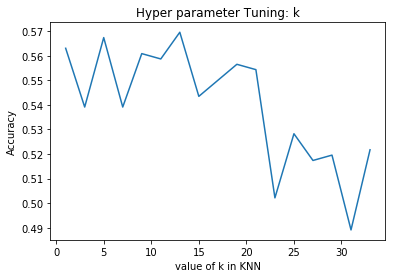

In [174]:
#Plotting the accuracy against different values of k while cross validation
plotAccuracy(accuracyList)

In [123]:
# 3 b.iv)From the maximum k obtained during cross validation, 
#I am evaluating the test set using KNN and the following set of distances
distanceMetricsList = ["euclidean","manhattan","hamming","similarity"]

givenLabelsList = computeTestLabels(n_test_df)

for distance_metric in distanceMetricsList:
    accuracy_list = []
    testLabelsList = KNN(max_k,n_train_df,n_test_df,distance_metric)
    accuracy = computeAccuracy(testLabelsList,givenLabelsList)
    print("Accuracy for the distance metric {} is : {}". 
          format(distance_metric, accuracy))
    accuracy_list.append(accuracy)
    

Accuracy for the distance metric euclidean is : 0.6470588235294118
Accuracy for the distance metric manhattan is : 0.6470588235294118
Accuracy for the distance metric hamming is : 0.5098039215686274
Accuracy for the distance metric similarity is : 0.5098039215686274


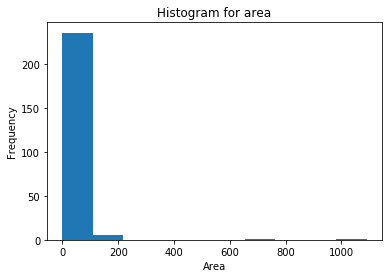

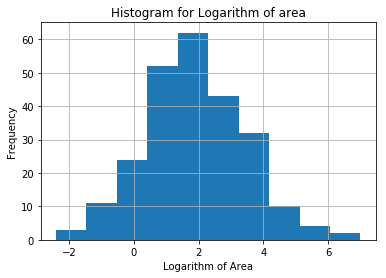

In [175]:
#Linear regression
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import math

#3 c.i) Plotting the histogram of area and Logarithm of area
train_df  = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df = train_df.loc[train_df['area'] > 0]

#to plot the histogram of area
plt.hist(train_df.iloc[:,12])
plt.ylabel('Frequency')
plt.xlabel('Area')
plt.title('Histogram for area')
plt.show()

#to plot the logarithm of area
train_df['area'].apply(np.log).hist()
plt.ylabel('Frequency')
plt.xlabel('Logarithm of Area')
plt.title('Histogram for Logarithm of area')
plt.show()

In [176]:
#Normalization of the features, last column corresponds to the output variable
s_train_df = train_df.iloc[:,:12]
s_test_df = test_df.iloc[:,:12]

#Mean normalization
n_train_df=(s_train_df-s_train_df.mean())/(s_train_df.std())
n_test_df = (s_test_df-s_train_df.mean())/(s_train_df.std())

In [177]:
# 3 c.ii) Linear regression using OLS solution
from numpy.linalg import inv

X_train_df = n_train_df.iloc[:, :12]
Y_train_df = train_df.iloc[:, 12:13]

#OLS solution: weight = inv(X.T*X)*X.T*Y
def computeOLS(X_train, Y_train):
    product = np.matmul(X_train.T,X_train)
    inverse = np.linalg.inv(product)
    result = np.matmul(inverse,np.matmul(X_train.T,Y_train))
    return result

weights = computeOLS(X_train_df,Y_train_df)
print("Shape of the weight matrix is :", weights.shape)
print("weights obtained from OLS method are: {}". format(weights))

Shape of the weight matrix is : (12, 1)
weights obtained from OLS method are: [[  6.73662115]
 [ -1.21319632]
 [  6.8050393 ]
 [  5.75928603]
 [ -0.1072859 ]
 [ 12.04084568]
 [ -9.05296087]
 [ -5.55457647]
 [  5.5875579 ]
 [-10.45906908]
 [  2.0758261 ]
 [ -0.94204314]]


In [178]:
# 3 c.iii)Compute RSS error and correlation between actual and 
#predicted outcome variable

#to compute the RSS error
X_test_df = n_test_df
Y_test_df = test_df.iloc[:,12:13]

def computeRSSError(y_predict, y_actual):
    diff = y_predict - y_actual
    return np.sum(np.power(diff,2))

predicted_df = np.matmul(X_test_df,weights)
predicted_train_df = np.matmul(X_train_df,weights)


print("RSS error on test data is :", computeRSSError(predicted_df,Y_test_df).values)

corr = np.corrcoef(np.transpose(predicted_df), np.transpose(Y_test_df))

cov = np.cov(predicted_df.T, Y_test_df.T)

print("Covariance matrix:")
print(cov)

print("Correlation matrix:")
print(corr)

print("Correlation between predicted and actual outcome variable is: ", corr[0,1])

RSS error on test data is : [130284.78439442]
Covariance matrix:
[[ 363.42063238  158.92424192]
 [ 158.92424192 2228.93362549]]
Correlation matrix:
[[1.         0.17657808]
 [0.17657808 1.        ]]
Correlation between predicted and actual outcome variable is:  0.17657808014781162


In [181]:
# Repeating Linear regression by taking logarithm of area as the output variable
#to compute the RSS error
from numpy.linalg import inv

X_train_df = n_train_df.iloc[:, :12]
Y_train_df = train_df.iloc[:, 12:13]
Y_train_log_df = np.log(Y_train_df.values)

#OLS solution: weight = inv(X.T*X)*X.T*Y
def computeOLS(X_train, Y_train):
    product = np.matmul(X_train.T,X_train)
    inverse = np.linalg.inv(product)
    result = np.matmul(inverse,np.matmul(X_train.T,Y_train))
    return result

weights = computeOLS(X_train_df,Y_train_log_df)
print("Shape of the weight matrix is :", weights.shape)
print("weights obtained from OLS method are: {}". format(weights))

s_test_df = test_df.loc[test_df['area'] > 0]
s_test_df = s_test_df.iloc[:,:12]

n_test_df = (s_test_df - s_train_df.mean())/(s_train_df.std())

X_test_df = n_test_df
Y_test_df = test_df.iloc[:,12:13]
Y_test_df = Y_test_df.loc[Y_test_df['area'] > 0]
Y_test_log_df = np.log(Y_test_df.values)

def computeRSSError(y_predict, y_actual):
    diff = y_predict - y_actual
    return np.sum(np.power(diff,2))

predicted_df = np.matmul(X_test_df,weights)

print("RSS error on test data with log area is: ",computeRSSError(predicted_df,Y_test_log_df))

corr = np.corrcoef(predicted_df.T, Y_test_log_df.T)
cov = np.cov(predicted_df.T, Y_test_log_df.T)

print("Covariance matrix:")
print(cov)

print("Correlation matrix:")
print(corr)

print("Correlation between predicted and actual outcome variable is: ", corr[0,1])

Shape of the weight matrix is : (12, 1)
weights obtained from OLS method are: [[ 0.02592881]
 [-0.12537356]
 [ 0.27153282]
 [ 0.17042503]
 [ 0.01022079]
 [ 0.26823179]
 [-0.38188961]
 [-0.19135272]
 [-0.10406242]
 [-0.20374163]
 [ 0.02775759]
 [ 0.06265049]]
RSS error on test data with log area is:  136.35103079050305
Covariance matrix:
[[0.09504973 0.00772395]
 [0.00772395 2.19934618]]
Correlation matrix:
[[1.         0.01689341]
 [0.01689341 1.        ]]
Correlation between predicted and actual outcome variable is:  0.016893405156312526


In [182]:
# 3 c.iv) Bonus part, for experimenting with different non-linear functions of input features
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_df  = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df = train_df.loc[train_df['area'] > 0]

X_train_df = train_df.iloc[:,:12]
Y_train_df = train_df.iloc[:,12:13]

X_test_df = test_df.iloc[:,:12]
Y_test_df = test_df.iloc[:,12:13]

#Fitting polynomial regression to the data set -- degree 2
poly = PolynomialFeatures(2)
poly.fit_transform(X_train_df)
poly_train_df = poly.transform(X_train_df)
poly_test_df = poly.transform(X_test_df)

print("shape of train data after polynomial transformation:" ,poly_train_df.shape)
print("shape of test data after polynomial transformation:",poly_test_df.shape)

#do a normalization
n_train_df = (poly_train_df - poly_train_df.mean())/(poly_train_df.std())
n_test_df = (poly_test_df - poly_train_df.mean())/(poly_train_df.std())

lin_reg_degree_2 = LinearRegression()
lin_reg_degree_2.fit(n_train_df, Y_train_df)

predicted_df = lin_reg_degree_2.predict(n_test_df)
predicted_train_df = lin_reg_degree_2.predict(n_train_df)

polynomial_degree_list = [2,3 ,4]
RSS_error_test_list = []
RSS_error_train_list = []

RSS_error_test_list.append(computeRSSError(predicted_df,Y_test_df).values[0])
RSS_error_train_list.append(computeRSSError(predicted_train_df,Y_train_df).values[0])
print("RSS error on train is: ",
      computeRSSError(predicted_train_df,Y_train_df).values[0])
print("RSS error on test is: ",
      computeRSSError(predicted_df,Y_test_df).values[0])

shape of train data after polynomial transformation: (243, 91)
shape of test data after polynomial transformation: (51, 91)
RSS error on train is:  1488360.124120776
RSS error on test is:  404744.6917541748


In [183]:
#Fitting polynomial regression to the data set -- degree 3
poly = PolynomialFeatures(3)
poly.fit_transform(X_train_df)
poly_train_df = poly.transform(X_train_df)
poly_test_df = poly.transform(X_test_df)

print("shape of train data after polynomial transformation:" ,poly_train_df.shape)
print("shape of test data after polynomial transformation:",poly_test_df.shape)

#do a normalization
n_train_df = (poly_train_df - poly_train_df.mean())/(poly_train_df.std())
n_test_df = (poly_test_df - poly_train_df.mean())/(poly_train_df.std())

lin_reg_degree_3 = LinearRegression()
lin_reg_degree_3.fit(n_train_df, Y_train_df)

predicted_df = lin_reg_degree_3.predict(n_test_df)
predicted_train_df = lin_reg_degree_3.predict(n_train_df)

RSS_error_test_list.append(computeRSSError(predicted_df,Y_test_df).values[0])
RSS_error_train_list.append(computeRSSError(predicted_train_df,Y_train_df).values[0])

print("RSS error on train is: ",
      computeRSSError(predicted_train_df,Y_train_df).values[0])
print("RSS error on test is: ",
      computeRSSError(predicted_df,Y_test_df).values[0])

shape of train data after polynomial transformation: (243, 455)
shape of test data after polynomial transformation: (51, 455)
RSS error on train is:  167.28000000000003
RSS error on test is:  125566492.65370616


In [184]:
#Fitting polynomial regression to the data set -- degree 4
poly = PolynomialFeatures(4)
poly.fit_transform(X_train_df)
poly_train_df = poly.transform(X_train_df)
poly_test_df = poly.transform(X_test_df)

print("shape of train data after polynomial transformation: " ,poly_train_df.shape)
print("shape of test data after polynomial transformation: ",poly_test_df.shape)

#do a normalization
n_train_df = (poly_train_df - poly_train_df.mean())/(poly_train_df.std())
n_test_df = (poly_test_df - poly_train_df.mean())/(poly_train_df.std())

lin_reg_degree_4 = LinearRegression()
lin_reg_degree_4.fit(n_train_df, Y_train_df)

predicted_df = lin_reg_degree_4.predict(n_test_df)
predicted_train_df = lin_reg_degree_4.predict(n_train_df)

RSS_error_test_list.append(computeRSSError(predicted_df,Y_test_df).values[0])
RSS_error_train_list.append(computeRSSError(predicted_train_df,Y_train_df).values[0])

print("RSS error on train is: ",
      computeRSSError(predicted_train_df,Y_train_df).values[0])
print("RSS error on test is: ",
      computeRSSError(predicted_df,Y_test_df).values[0])

shape of train data after polynomial transformation:  (243, 1820)
shape of test data after polynomial transformation:  (51, 1820)
RSS error on train is:  167.2800000000098
RSS error on test is:  806139453.6862723


In [185]:
print(RSS_error_test_list)
print(RSS_error_train_list)

[404744.6917541748, 125566492.65370616, 806139453.6862723]
[1488360.124120776, 167.28000000000003, 167.2800000000098]


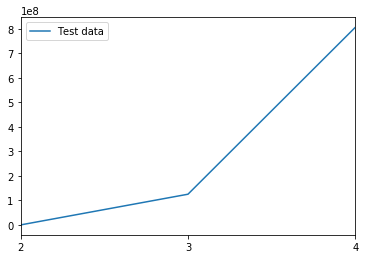

In [186]:
plt.plot(polynomial_degree_list, RSS_error_test_list)
plt.legend(['Test data'])
plt.xlim([2,4])
plt.xticks(np.arange(2,5,step=1))
plt.show()

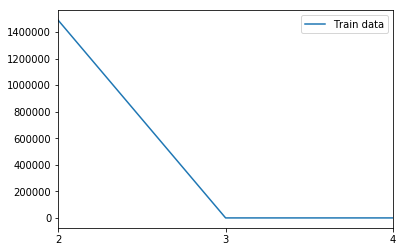

In [187]:
plt.plot(polynomial_degree_list, RSS_error_train_list)
plt.legend(['Train data'])
plt.xlim([2,4])
plt.xticks(np.arange(2,5,step=1))
plt.show()